In [27]:
import utils as u
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

regressor = XGBRegressor(
        learning_rate=0.1,
        n_estimators=100,
        max_depth=10,
        random_state=42,
        tree_method="hist",
        enable_categorical=True,
)

cv = TimeSeriesSplit(n_splits=10)

In [11]:
X, y = u.get_model_data()

In [12]:
X = u.merge.transform(X)
X = u.date_encoder.transform(X)
X = u.drop_cols_transformer.transform(X)
X = u.table_vectorizer.fit_transform(X)

In [16]:
X.head()

,"counter_name: bagnolet, charenton, avenue","counter_name: austerlitz, orsay, quai","counter_name: issy, face, marne","counter_name: invalides, concorde, charles","counter_name: montparnasse, boulevard, voltaire","counter_name: sébastopol, vaugirard, totem","counter_name: françois, mauriac, 39","counter_name: tournelle, grenelle, hôtel","counter_name: pompidou, turbigo, georges","counter_name: aubervilliers, rivoli, cours",...,rr12,rr3,month_day,week_day,year,month,hour,is_holiday,covid_state,is_school_holiday
0,0.057572,0.054169,0.057462,0.059713,46.483410,0.069526,0.052654,0.055580,0.053492,0.056420,...,0.0,0.0,1.0,2.0,2020.0,9.0,1.0,0.0,0.0,0.0
30,0.057780,0.054482,0.057693,0.059901,46.481449,0.069527,0.052890,0.055847,0.053816,0.056616,...,0.0,0.0,1.0,2.0,2020.0,9.0,1.0,0.0,0.0,0.0
31,0.069627,0.075935,0.080185,0.061554,0.054471,0.059024,0.071173,46.412075,0.056011,0.059944,...,0.0,0.0,1.0,2.0,2020.0,9.0,1.0,0.0,0.0,0.0
32,0.069617,0.075945,0.080126,0.062366,0.058962,0.061268,0.071218,46.403725,0.056837,0.059939,...,0.0,0.0,1.0,2.0,2020.0,9.0,1.0,0.0,0.0,0.0
33,34.408562,0.071839,0.065165,0.068040,0.053102,0.056112,0.073869,0.077313,0.064648,0.061351,...,0.0,0.0,1.0,2.0,2020.0,9.0,1.0,0.0,0.0,0.0


In [28]:
scores = -cross_val_score(regressor, X, y, cv=cv, scoring='neg_root_mean_squared_error')

In [29]:
scores

array([0.92481064, 0.54835314, 0.86095839, 0.74037456, 0.73695505,
       0.78884901, 0.65806419, 0.76644384, 0.79345003, 0.48158763])

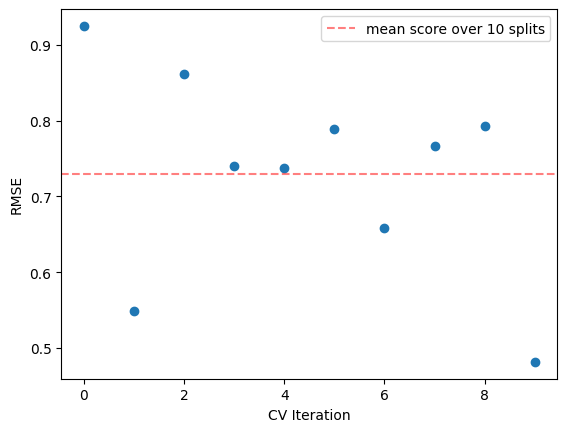

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.arange(len(scores)), scores)
plt.axhline(np.mean(scores), color='red', label='mean score over 10 splits', linestyle='--', alpha=0.5)
plt.xlabel('CV Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.show()